In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Txt + png:

In [6]:
import os
import pandas as pd

# Directorio donde están los archivos .txt y .png
data_directory = "/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos"
output_file = os.path.join(data_directory, "Stress_data_with_images.csv")  # Nombre del archivo final

# Lista para almacenar los datos combinados
combined_data = []

# Recorrer todos los archivos .txt en el directorio
for filename in os.listdir(data_directory):
    if filename.endswith(".txt"):  # Procesar solo archivos .txt
        file_path_txt = os.path.join(data_directory, filename)

        # Obtener el nombre base del modelo (sin extensión)
        model_name = filename.replace(".txt", "")

        # Verificar si existe la imagen asociada (.png)
        image_path = os.path.join(data_directory, model_name + ".png")
        if not os.path.exists(image_path):
            print(f"Imagen no encontrada para el modelo: {model_name}")
            continue  # Saltar si no existe la imagen

        # Leer el archivo .txt
        with open(file_path_txt, "r") as file:
            lines = file.readlines()

            # Omitir la cabecera y procesar los datos
            for line in lines[1:]:  # Saltar la primera línea (cabecera)
                parts = line.split()

                # Asegurarse de que la línea contiene al menos las columnas necesarias
                if len(parts) >= 5:  # Verifica que hay al menos 5 columnas en la línea
                    # Ignorar las dos primeras columnas y procesar a partir de la tercera
                    min_stress = float(parts[2])  # Mínimo [MPa]
                    max_stress = float(parts[3])  # Máximo [MPa]
                    avg_stress = float(parts[4])  # Promedio [MPa]

                    # Guardar los datos con la ruta de la imagen
                    combined_data.append({
                        "Model": model_name,
                        "Min Stress [MPa]": min_stress,
                        "Max Stress [MPa]": max_stress,
                        "Avg Stress [MPa]": avg_stress,
                        "Image Path": image_path  # Ruta de la imagen asociada
                    })

# Crear un DataFrame con los datos combinados
df = pd.DataFrame(combined_data)

# Verificar que el DataFrame no está vacío antes de guardar
if df.empty:
    print("El DataFrame está vacío. Verifique los archivos de entrada.")
else:
    # Guardar en un archivo CSV
    df.to_csv(output_file, index=False)
    print(f"Datos combinados guardados en {output_file}")

# Opcional: Mostrar una vista previa del DataFrame para confirmar
print(df.head())


Datos combinados guardados en /content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/Stress_data_with_images.csv
  Model  Min Stress [MPa]  Max Stress [MPa]  Avg Stress [MPa]  \
0     1            99.029            269.11            123.03   
1     2            94.372            270.07            122.91   
2     3            87.550            274.14            122.56   
3     4            94.505            270.71            122.98   
4     5            86.406            275.85            122.69   

                                          Image Path  
0  /content/drive/MyDrive/MNA/MNA - Colab/Proyect...  
1  /content/drive/MyDrive/MNA/MNA - Colab/Proyect...  
2  /content/drive/MyDrive/MNA/MNA - Colab/Proyect...  
3  /content/drive/MyDrive/MNA/MNA - Colab/Proyect...  
4  /content/drive/MyDrive/MNA/MNA - Colab/Proyect...  


In [7]:
!head -n 10 "/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/Stress_data_with_images.csv"

Model,Min Stress [MPa],Max Stress [MPa],Avg Stress [MPa],Image Path
1,99.029,269.11,123.03,/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/1.png
2,94.372,270.07,122.91,/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/2.png
3,87.55,274.14,122.56,/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/3.png
4,94.505,270.71,122.98,/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/4.png
5,86.406,275.85,122.69,/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/5.png
6,88.38,275.15,122.59,/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/6.png
7,84.44,275.5,122.57,/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/7.png
8,90.

¿Cuáles son las estadísticas resumidas del conjunto de datos?

In [8]:
import pandas as pd
# Carga tus datos en un DataFrame
df = pd.read_csv("/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/Stress_data_with_images.csv")  # Archivo con tus valores de estrés

In [9]:
# Estadísticas resumidas
print(df.describe())

          Model  Min Stress [MPa]  Max Stress [MPa]  Avg Stress [MPa]
count  20.00000         20.000000         20.000000         20.000000
mean   10.50000         85.854642        272.929500        122.716000
std     5.91608         20.517763          4.422024          0.383494
min     1.00000          0.593850        264.530000        121.200000
25%     5.75000         86.322750        270.412500        122.685000
50%    10.50000         89.353000        273.230000        122.760000
75%    15.25000         93.382000        275.177500        122.895000
max    20.00000         99.029000        285.650000        123.030000


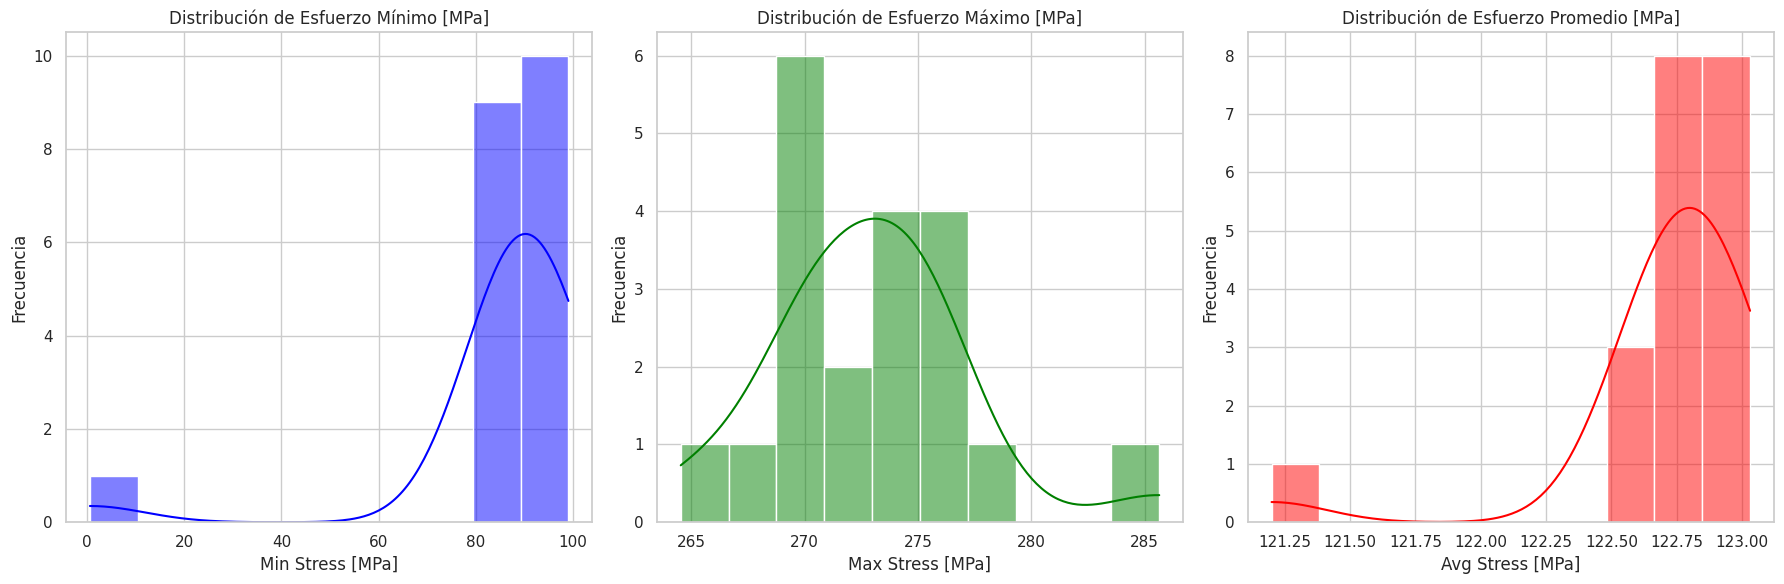

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame
df = pd.read_csv("/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/Stress_data_with_images.csv")

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con varios subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma para Min Stress [MPa]
sns.histplot(df['Min Stress [MPa]'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de Esfuerzo Mínimo [MPa]')
axes[0].set_xlabel('Min Stress [MPa]')
axes[0].set_ylabel('Frecuencia')

# Histograma para Max Stress [MPa]
sns.histplot(df['Max Stress [MPa]'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución de Esfuerzo Máximo [MPa]')
axes[1].set_xlabel('Max Stress [MPa]')
axes[1].set_ylabel('Frecuencia')

# Histograma para Avg Stress [MPa]
sns.histplot(df['Avg Stress [MPa]'], bins=10, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribución de Esfuerzo Promedio [MPa]')
axes[2].set_xlabel('Avg Stress [MPa]')
axes[2].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

¿Hay valores atípicos?

In [12]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv("/content/drive/MyDrive/MNA/MNA - Colab/Proyecto Integrador/Avance 1_Exploración de Datos/Base de datos/Stress_data_with_images.csv")

# Función para detectar valores atípicos usando el método IQR
def detect_outliers(df, column):
    # Calcular los cuartiles Q1 y Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calcular el IQR
    IQR = Q3 - Q1

    # Definir los límites superior e inferior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los valores atípicos
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Detectar valores atípicos para cada columna
outliers_min_stress = detect_outliers(df, 'Min Stress [MPa]')
outliers_max_stress = detect_outliers(df, 'Max Stress [MPa]')
outliers_avg_stress = detect_outliers(df, 'Avg Stress [MPa]')

# Mostrar los valores atípicos encontrados
print("Valores atípicos de Min Stress [MPa]:")
print(outliers_min_stress)

print("\nValores atípicos de Max Stress [MPa]:")
print(outliers_max_stress)

print("\nValores atípicos de Avg Stress [MPa]:")
print(outliers_avg_stress)

Valores atípicos de Min Stress [MPa]:
    Model  Min Stress [MPa]  Max Stress [MPa]  Avg Stress [MPa]  \
18     19           0.59385            264.53             121.2   

                                           Image Path  
18  /content/drive/MyDrive/MNA/MNA - Colab/Proyect...  

Valores atípicos de Max Stress [MPa]:
    Model  Min Stress [MPa]  Max Stress [MPa]  Avg Stress [MPa]  \
11     12            88.658            285.65            122.82   

                                           Image Path  
11  /content/drive/MyDrive/MNA/MNA - Colab/Proyect...  

Valores atípicos de Avg Stress [MPa]:
    Model  Min Stress [MPa]  Max Stress [MPa]  Avg Stress [MPa]  \
18     19           0.59385            264.53             121.2   

                                           Image Path  
18  /content/drive/MyDrive/MNA/MNA - Colab/Proyect...  


¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

In [13]:
# Calcular la asimetría (skewness) de las variables numéricas
skew_min_stress = df['Min Stress [MPa]'].skew()
skew_max_stress = df['Max Stress [MPa]'].skew()
skew_avg_stress = df['Avg Stress [MPa]'].skew()

# Imprimir los resultados
print(f"Asimetría de Min Stress [MPa]: {skew_min_stress}")
print(f"Asimetría de Max Stress [MPa]: {skew_max_stress}")
print(f"Asimetría de Avg Stress [MPa]: {skew_avg_stress}")


Asimetría de Min Stress [MPa]: -4.148709735816935
Asimetría de Max Stress [MPa]: 0.8617845259617456
Asimetría de Avg Stress [MPa]: -3.514051084550601


¿Hay correlación entre las variables dependientes e independientes?

In [14]:
print(df.dtypes)


Model                 int64
Min Stress [MPa]    float64
Max Stress [MPa]    float64
Avg Stress [MPa]    float64
Image Path           object
dtype: object


In [15]:
# Calcula la matriz de correlación (sin incluir 'Time [s]')
correlation_matrix = df[['Min Stress [MPa]', 'Max Stress [MPa]', 'Avg Stress [MPa]']].corr()

# Muestra la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                  Min Stress [MPa]  Max Stress [MPa]  Avg Stress [MPa]
Min Stress [MPa]          1.000000          0.348992          0.975269
Max Stress [MPa]          0.348992          1.000000          0.271530
Avg Stress [MPa]          0.975269          0.271530          1.000000
